<a href="https://colab.research.google.com/github/Mohitgirase0001/Crop-recommendation-and-crop-yield-prediction-using-machine-learning/blob/main/crop_yield_prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset
file_path = "/content/new_crop_yield_indianewfinal.csv"
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Season,State,Annual_Rainfall,Pesticide,Yield,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius at 2 Meters,Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,Whole Year,Assam,2051.4,22882.34,0.796087,West,Sandy,Cotton,897.077239,27.676966,17.72,83.40,False,True,Cloudy,122,6.555816
1,Kharif,Assam,2051.4,2057.47,0.710435,South,Clay,Rice,992.673282,18.026142,17.54,82.11,True,True,Rainy,140,8.527341
2,Kharif,Assam,2051.4,246.76,0.238333,North,Loam,Barley,147.998025,29.794042,17.81,82.79,False,False,Sunny,106,1.127443
3,Whole Year,Assam,2051.4,6093.36,5238.051739,North,Sandy,Soybean,986.866331,16.644190,17.61,85.07,False,True,Rainy,146,6.517573
4,Kharif,Assam,2051.4,539.09,0.420909,South,Silt,Wheat,730.379174,31.620687,17.61,84.12,True,True,Cloudy,110,7.248251


In [ ]:
# Convert categorical variables to numeric for better visualization
df_encoded = df.copy()
categorical_cols = ['Season', 'State', 'Region', 'Soil_Type', 'Crop', 'Weather_Condition']
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols)


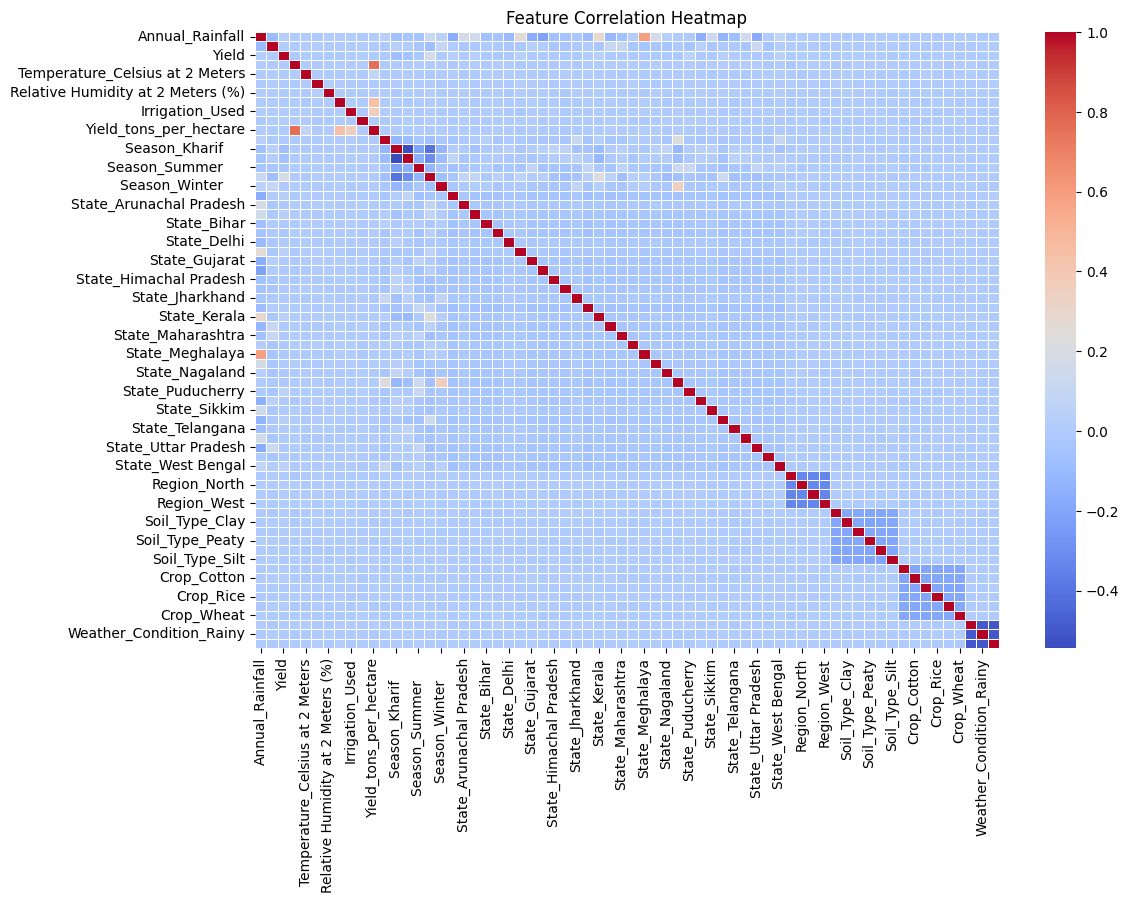

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

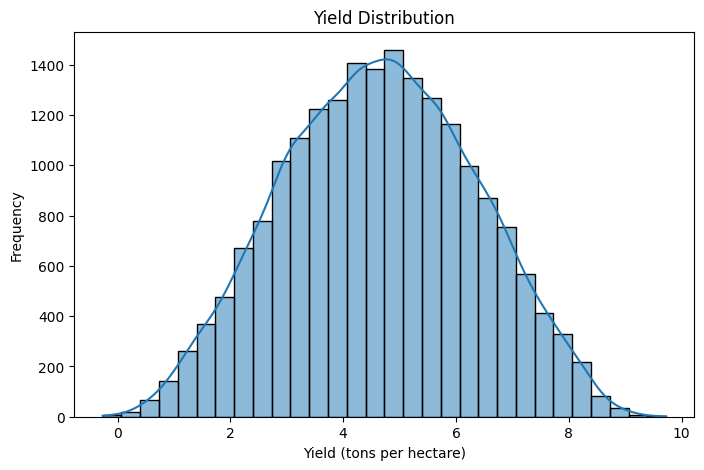

In [ ]:
# Yield distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Yield_tons_per_hectare'], kde=True, bins=30)
plt.title("Yield Distribution")
plt.xlabel("Yield (tons per hectare)")
plt.ylabel("Frequency")
plt.show()

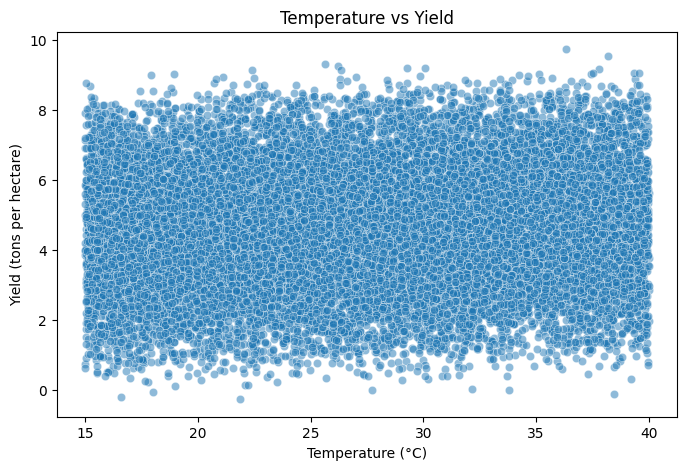

In [ ]:
# Relationship between temperature and yield
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Temperature_Celsius at 2 Meters'], y=df['Yield_tons_per_hectare'], alpha=0.5)
plt.title("Temperature vs Yield")
plt.xlabel("Temperature (°C)")
plt.ylabel("Yield (tons per hectare)")
plt.show()

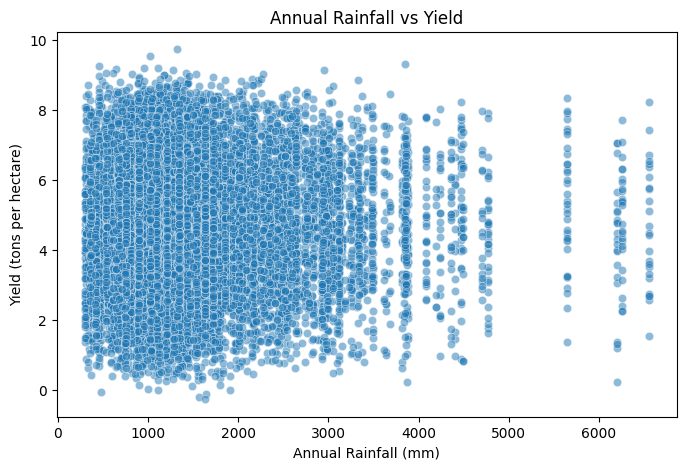

In [ ]:
# Rainfall vs Yield
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Annual_Rainfall'], y=df['Yield_tons_per_hectare'], alpha=0.5)
plt.title("Annual Rainfall vs Yield")
plt.xlabel("Annual Rainfall (mm)")
plt.ylabel("Yield (tons per hectare)")
plt.show()


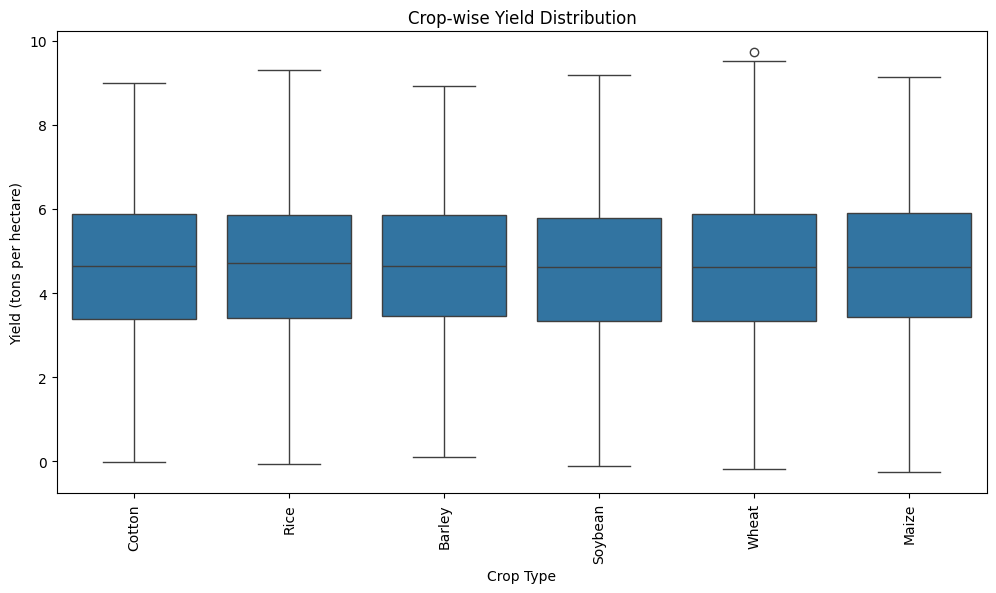

In [ ]:
# Boxplot for crop-wise yield comparison
plt.figure(figsize=(12, 6))
sns.boxplot(x='Crop', y='Yield_tons_per_hectare', data=df)
plt.xticks(rotation=90)
plt.title("Crop-wise Yield Distribution")
plt.xlabel("Crop Type")
plt.ylabel("Yield (tons per hectare)")
plt.show()

In [ ]:
# Encode categorical variables
categorical_cols = ['Season', 'State', 'Region', 'Soil_Type', 'Crop', 'Weather_Condition']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


In [ ]:
# Split data into features and target
X = df.drop(columns=['Yield_tons_per_hectare'])
y = df['Yield_tons_per_hectare']

In [ ]:
# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf'),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Linear Regression": LinearRegression()
}

In [ ]:
# Train and evaluate models
model_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    accuracy = r2 * 100  # Convert R² score to percentage
    model_scores[name] = accuracy
    print(f"{name} Model Accuracy: {accuracy:.2f}%")


Random Forest Model Accuracy: 90.45%
SVR Model Accuracy: 89.91%
KNN Model Accuracy: 81.64%
Linear Regression Model Accuracy: 91.23%


In [ ]:
# Determine the best model
best_model = max(model_scores, key=model_scores.get)
print(f"Best Model: {best_model} with Accuracy: {model_scores[best_model]:.2f}%")

Best Model: Linear Regression with Accuracy: 91.23%


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Define feature variables (X) and target variable (y)
X = df.drop(columns=['Yield_tons_per_hectare'])  # Drop the target variable
y = df['Yield_tons_per_hectare']


In [ ]:
# Handle categorical data if any
X = pd.get_dummies(X, drop_first=True)

In [ ]:
 #Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Print evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

Mean Absolute Error: 0.4010836706682409
Mean Squared Error: 0.25387395174796823
Root Mean Squared Error: 0.5038590594084503
R-squared Score: 0.91233380937377


In [ ]:
# Manually enter feature values (replace with actual column names & values)
manual_input = {
    'Season': 'Whole Year',
    'State': 'Goa',
    'Annual_Rainfall': 3879.3,
    'Pesticide': 148388.84,
    'Yield' : 0.32,
    'Region' : 'South',
    'Soil_Type' : 'Chalky',
    'Crop' : 'Cotton',
    'Rainfall_mm':368.3224602,
    'Temperature_Celsius at 2 Meters' : 37.77381,
    'Specific Humidity at 2 Meters (g/kg)' : 18.15,
    'Relative Humidity at 2 Meters (%)' : 85.33,
    'Fertilizer_Used' : False,
    'Irrigation_Used' : False,
    'Weather_Condition' : 'Rainy',
    'Days_to_Harvest' : 62
}

In [ ]:
# Convert input to DataFrame
manual_df = pd.DataFrame([manual_input])

In [ ]:
# Ensure categorical features match training set encoding
manual_df = pd.get_dummies(manual_df)


In [ ]:
# Align with training feature columns
manual_df = manual_df.reindex(columns=X_train.columns, fill_value=0)


In [ ]:
# Make prediction
predicted_yield = model.predict(manual_df)

print("Predicted Yield (tons per hectare):", predicted_yield[0])

Predicted Yield (tons per hectare): 2.6025775171806433


In [ ]:
import joblib

# After training our model
joblib.dump(model, "final_crop_yield_model.pkl")

['final_crop_yield_model.pkl']